# Introdução
* O Dataset analisado foi obtido no Kaggle [GLOBAL_YOUTUBE_STATISTICS_2023 (clique aqui)](https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023) e traz detalhes sobre os canais do YouTube com maiores quantidades de inscritos.
* O objetivo da análise é descobrir quais seriam as melhores categorias a serem abordadas no YouTube e conhecer os canais da plataforma, sua idade, maiores ganhos e o total de visualizações de seus vídeos.

In [26]:
#importando pacotes e libraries*
# para análise
import pandas as pd
import numpy as np
#Para gráficos
from matplotlib import pyplot as plt
import seaborn as sns
#Para manipulação de datas/calendário
import datetime as dt

In [27]:
# Lendo o conjunto de dados
data = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')

# Conhecendo o Dataset e verificando os dados para análise

In [3]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

Aqui é possível observar que as datas estão como float, faremos a conversão mais a frente

In [7]:
# verificando a existência de valores nulos
data.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [7]:
# descobrindo a média de valores que estão faltando
data.isnull().mean()

rank                                       0.000000
Youtuber                                   0.000000
subscribers                                0.000000
video views                                0.000000
category                                   0.046231
Title                                      0.000000
uploads                                    0.000000
Country                                    0.122613
Abbreviation                               0.122613
channel_type                               0.030151
video_views_rank                           0.001005
country_rank                               0.116583
channel_type_rank                          0.033166
video_views_for_the_last_30_days           0.056281
lowest_monthly_earnings                    0.000000
highest_monthly_earnings                   0.000000
lowest_yearly_earnings                     0.000000
highest_yearly_earnings                    0.000000
subscribers_for_last_30_days               0.338693
created_year

Os dados nulos não estão em grande quantidade nas colunas de maior interesse.

In [9]:
data.sort_values(by=['subscribers'], ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


O canal que ocupa a primeira posição está localizado na Índia, trata sobre música, foi criado em 13/03/2006, tem 20082 uploads, 245 milhões de subscribes;
Os dados são organizados a partir do Ranking do canal de 1 a 995, o qual é definido pelo número de inscritos.

In [12]:
#removendo valores duplicados
data.drop_duplicates().shape

(995, 28)

Não há dados duplicados já que o número de linhas e colunas permanece o mesmo após a remoção

### Visão geral do Dataset

In [13]:
# visualizando o contexto geral dos dados
data.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


Existe visualização de vídeos com 0 e canal com 0 uploads, a maior visualização de vídeos está em 2.280000e+11
O maior upload é 301308.000000
a média de visualizações dos vídeos de todos os canais é 1.103954e+10
o canal mais recente foi criado em 2022 e o mais antigo foi criado em 1970

In [16]:
#Verificando as categorias mais frequentes
data.value_counts(data['category'], dropna=False)

category
Entertainment            241
Music                    202
People & Blogs           132
Gaming                    94
Comedy                    69
NaN                       46
Film & Animation          46
Education                 45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    11
Pets & Animals             4
Nonprofits & Activism      2
Movies                     2
Trailers                   2
Autos & Vehicles           2
Travel & Events            1
Name: count, dtype: int64

In [15]:
len(data['category'].unique())

19

O conjunto de dados contem 19 categorias, incluindo valores nulos, sendo que a a maior parte dos canais estão na categoria entreterimento, seguida de música.

In [15]:
data.value_counts(data['channel_type'], dropna=False)

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
NaN               30
Tech              17
Sports            13
Animals            3
Autos              3
Nonprofit          2
Name: count, dtype: int64

As informações da coluna Tipo de canal e categoria são semelhantes, mas a coluna categoria traz dados mais específicos

In [14]:
# Países que estão no conjunto de dados
data.value_counts(data['Country'])

Country
United States           313
India                   168
Brazil                   62
United Kingdom           43
Mexico                   33
Indonesia                28
Spain                    22
Thailand                 18
South Korea              17
Russia                   16
Canada                   15
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia              9
Australia                 9
Ukraine                   8
United Arab Emirates      7
Pakistan                  6
Germany                   6
France                    5
Japan                     5
Sweden                    4
Turkey                    4
Netherlands               3
Vietnam                   3
Jordan                    3
Chile                     3
Singapore                 3
Italy                     2
Iraq                      2
Egypt                     2
Ecuador                   2
Switzerland               1
Venezuela                 1
Afghanistan 

In [16]:
len(data['Country'].unique())

50

São 50 países presentes no dataset e o país com mais canais é os Estados Unidos da América, seguido da Índia e em 3º lugar o Brasil.

#### Visualizando as Categorias

In [17]:
# Visualizando a quantidade de categorias por porcentagem, existem canais que não possuem categorias
data['category'].value_counts(dropna=False, normalize=True)*100

category
Entertainment            24.221106
Music                    20.301508
People & Blogs           13.266332
Gaming                    9.447236
Comedy                    6.934673
Film & Animation          4.623116
NaN                       4.623116
Education                 4.522613
Howto & Style             4.020101
News & Politics           2.613065
Science & Technology      1.708543
Shows                     1.306533
Sports                    1.105528
Pets & Animals            0.402010
Trailers                  0.201005
Nonprofits & Activism     0.201005
Movies                    0.201005
Autos & Vehicles          0.201005
Travel & Events           0.100503
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Category histogram')

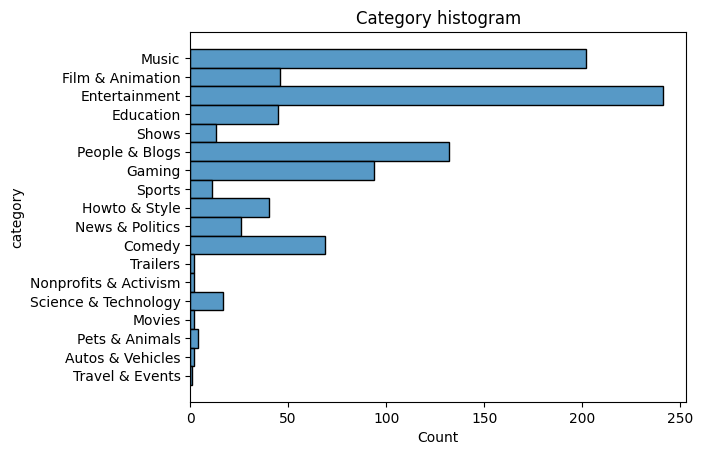

In [20]:
# Categorias com maior incidência
sns.histplot(data=data, y= 'category')
plt.title('Category histogram')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Autos & Vehicles'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Gaming'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Movies'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'People & Blogs'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Science & Technology'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Sports'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Travel & Events')])

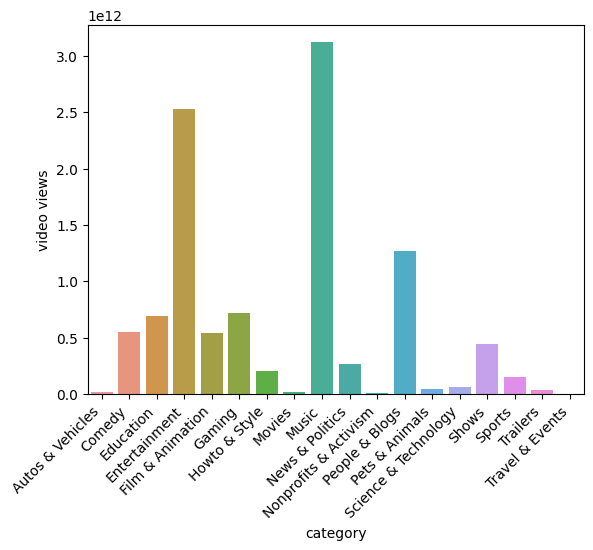

In [48]:
# Categorias com maiores visualizações de vídeos
categorias_visualizações = data[['video views', 'category']].groupby('category', sort=True).sum().reset_index()
sns.barplot(data=categorias_visualizações, x = 'category', y='video views', errorbar=("pi", 50))
plt.xticks(rotation=45,horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Autos & Vehicles'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Entertainment'),
  Text(4, 0, 'Film & Animation'),
  Text(5, 0, 'Gaming'),
  Text(6, 0, 'Howto & Style'),
  Text(7, 0, 'Movies'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'News & Politics'),
  Text(10, 0, 'Nonprofits & Activism'),
  Text(11, 0, 'People & Blogs'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Science & Technology'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Sports'),
  Text(16, 0, 'Trailers'),
  Text(17, 0, 'Travel & Events')])

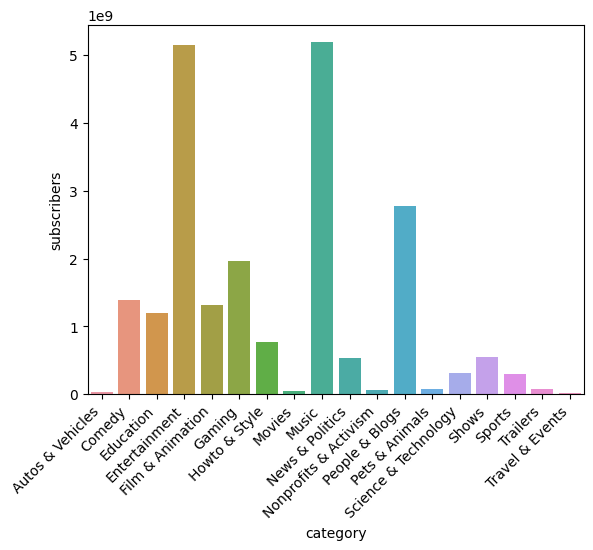

In [7]:
#categoria com maior número de inscritos
cat_subscribers = data['category']+ df_idade['created_year'].reset_index()
sns.barplot(data = cat_subscribers, x = 'category', y ='subscribers')
plt.xticks(rotation=45,horizontalalignment='right')


C:\Users\mihvi\AppData\Local\Temp\ipykernel_14384\4175463455.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data = data_brasil, x = 'video views', y = 'category', ci = False)


<Axes: xlabel='video views', ylabel='category'>

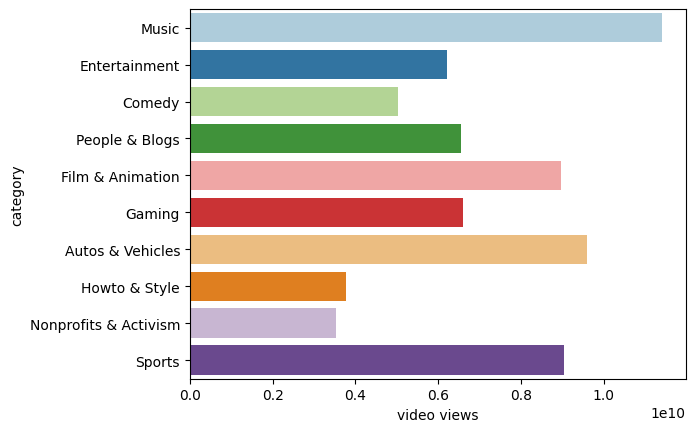

In [18]:
#Categorias mais visualizadas no Brasil
data_brasil = data[data['Country'] == 'Brazil'].reset_index()
data_brasil.groupby('category').sum()
sns.set_palette('Paired')
sns.barplot(data = data_brasil, x = 'video views', y = 'category', ci = False)
    

### Quantidade de visualizações de vídeos

<Figure size 900x300 with 0 Axes>

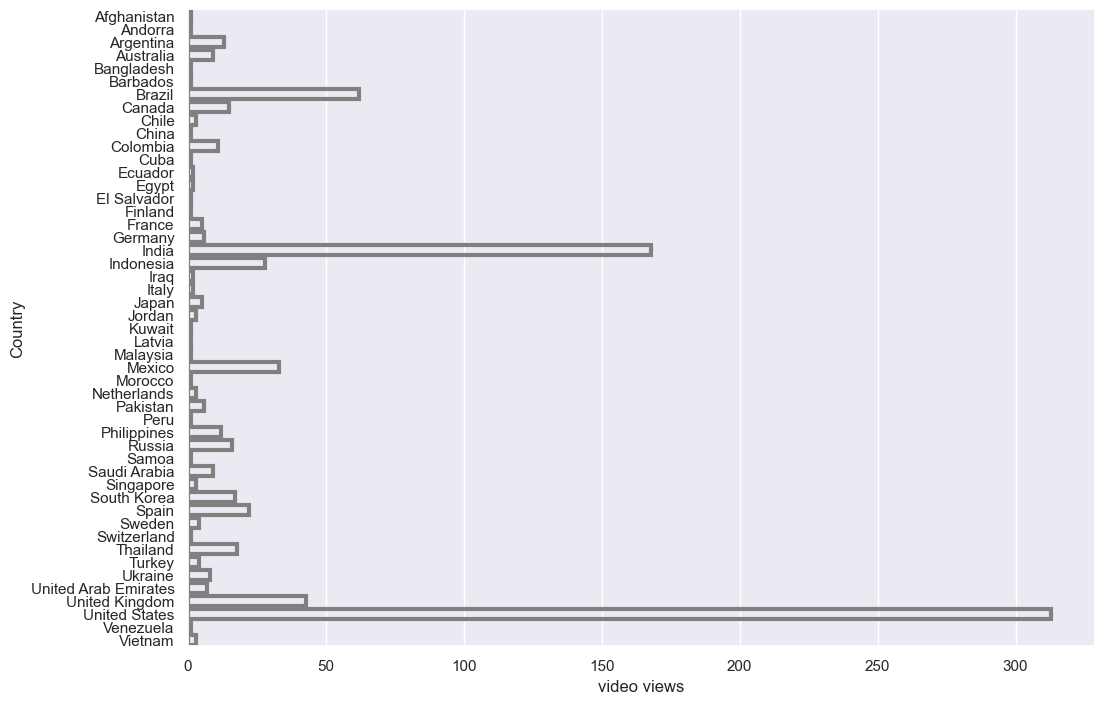

<Figure size 900x300 with 0 Axes>

In [62]:
#Canais por país com maiores visualizações de vídeos
country_video = data[['video views', 'Country']].groupby('Country').count().reset_index()
sns.barplot(data=country_video, x = 'video views', y = 'Country', errorbar = ('pi', 50), capsize = 4, errcolor = '.5', linewidth = 3, edgecolor = '0.5', facecolor = (0,0,0,0))
plt.figure(figsize=(9, 3))

In [10]:
# Canais com maiores visualizações de vídeos
data.sort_values(by=['video views'], ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
15,16,Sony SAB,83000000,1.010000e+11,Shows,Sony SAB,71270,India,IN,Entertainment,...,1100000.0,2007.0,Aug,4.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,174,Popular on YouTube,29300000,0.000000e+00,NaN,Popular on Youtube,3,NaN,NaN,Education,...,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
102,103,News,36300000,0.000000e+00,NaN,News,0,NaN,NaN,NaN,...,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.000000e+00,NaN,Minecraft - Topic,0,NaN,NaN,Games,...,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN


#### É possível verificar que o primeiro canal do Rank também é o canal com mais visualizações de vídeos. Porém, a posição dos canais com mais inscritos em 2º e 3º lugar muda em termos de visualização de vídeos.

### Rendimentos dos canais

In [11]:
#descobrindo os maiores ganhos anuais
data.sort_values(by='highest_yearly_earnings', ascending=False)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
495,496,ýýýýýýýýý KIMPRO,17700000,1.920670e+10,NaN,ýýýýýýýýý KIMPRO,1646,South Korea,KR,People,...,3200000.0,2017.0,Nov,11.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
417,418,DaFuq!?Boom!,19600000,7.906182e+09,Film & Animation,DaFuq!?Boom!,214,United States,US,Entertainment,...,6700000.0,2016.0,Jun,6.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
302,303,KL BRO Biju Rithvik,22800000,1.798835e+10,Entertainment,KL BRO Biju Rithvik,1841,NaN,NaN,Entertainment,...,3200000.0,2020.0,Jul,21.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,420,RKD Studios,19500000,5.234251e+09,Entertainment,RKD Studios,847,India,IN,Entertainment,...,300000.0,2014.0,Mar,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
687,688,BigSchool,15000000,9.996133e+09,Gaming,Big School,68,NaN,NaN,Film,...,NaN,2020.0,Dec,2.0,NaN,NaN,NaN,NaN,NaN,NaN
496,497,Jane ASMR ï¿½ï¿½,17700000,7.387622e+09,NaN,Jane ASMR ï¿½ï¿½,1888,South Korea,KR,People,...,NaN,2012.0,Nov,17.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922
592,593,Live,16100000,0.000000e+00,NaN,Live,0,NaN,NaN,NaN,...,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


O valor mais alto já recebido por ano e mensal está com o canal 495, da Coreia do Sul, o canal número 1 ocupa a 3ª posição

### Idade dos canais

In [42]:
data.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [28]:
# Tratando as datas
#Ano
data['created_year'] = data['created_year'].replace().astype(int)
# dia
data['created_date'] = data['created_date'].replace().astype(int)
# Mês
data['created_month'] = data['created_month'].str.replace('Jan', '1').replace('Feb', '2').replace('Mar','3').replace('Apr','4').replace('May','5').replace('Jun','6').replace('Jul','7').replace('Aug','8').replace('Sep','9').replace('Oct','10').replace('Nov','11').replace('Dec','12')
data['created_month'] = data['created_month'].replace().astype(int)
data.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [29]:
df_idade = data[['created_year', 'created_month', 'created_date']].reset_index()
df_idade['created_year'] = pd.to_datetime(df_idade['created_year'], format = '%Y').dt.strftime('%Y')
df_idade['created_month'] = pd.to_datetime(df_idade['created_month'], format = '%m').dt.strftime('%m')
df_idade['created_date'] = pd.to_datetime(df_idade['created_date'], format = '%d').dt.strftime('%d')


Text(0.5, 1.0, 'Created Year')

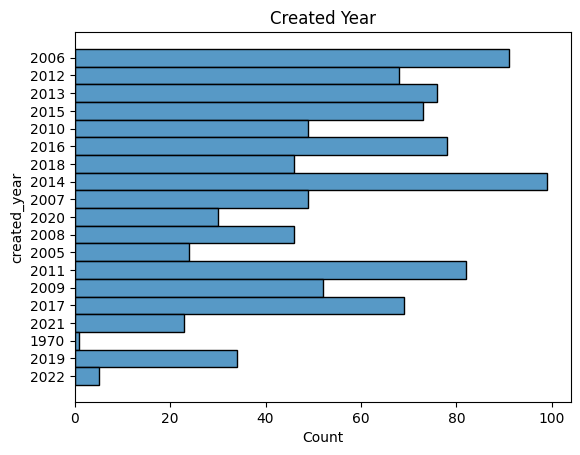

In [30]:
df_idade.groupby('created_year').sum()
sns.histplot(data=df_idade, y= 'created_year')
plt.title('Created Year')